<a href="https://colab.research.google.com/github/Sumit-Baviskar/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**





# **Problem Statement :**
Credit card fraud poses significant financial risks to both customers and companies. It is essential for credit card companies to effectively identify fraudulent transactions to protect customers from being charged for unauthorized purchases.




# **Introduction :**

In today’s digital era, credit card transactions have become a cornerstone of modern commerce. However, this convenience comes with an increased risk of fraudulent activities. Fraudulent credit card transactions can lead to significant financial losses and undermine trust in financial systems. As a result, detecting and preventing fraud has become a critical priority for financial institutions and businesses.

Credit card fraud detection presents unique challenges:

- **Highly Imbalanced Data :** Fraudulent transactions constitute a very small fraction of total transactions, making it difficult for models to learn effectively.

- **Dynamic Nature of Fraud :** Fraudsters constantly evolve their tactics, requiring models that can adapt and remain effective over time.
- **High Stakes of False Positives :** Misclassifying genuine transactions as fraudulent can lead to customer dissatisfaction and loss of trust.

This project seeks to provide an innovative and scalable solution to detect fraudulent credit card transactions, contributing to enhanced financial security and customer trust.



# **Dataset Overview :**

The dataset used in this project contains credit card transactions made by European cardholders in **September 2013** over a span of two days. It comprises **284,807 transactions**, of which **492 transactions (0.172%)** are labeled as fraudulent. This makes the dataset highly imbalanced, with fraudulent transactions representing a small fraction of the data.

### - **Key details about the dataset :**

- #### **Features :**

  - **V1, V2, ..., V28 :** Principal components obtained through PCA (Principal Component Analysis). The original features are unavailable due to confidentiality constraints.

  - **Time :** Time elapsed (in seconds) since the first transaction in the dataset.

  - **Amount :** Transaction amount, which can be used for cost-sensitive learning.

- #### **Target Variable :**
  
  - **Class :** Indicates whether a transaction is  **fraudulent (1) or genuine (0).**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.shape

(284807, 31)

In [ ]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data['Year'] = data['Time'].dt.year
print(data['Year'].value_counts())

Year
1970    284807
Name: count, dtype: int64


In [ ]:
# Extract month and year from 'Time'
data['Month'] = data['Time'].dt.month
print(data['Month'].value_counts())

Month
1    284807
Name: count, dtype: int64


In [ ]:
# Extract the day of the week from the 'Time' column
data['DayOfWeek'] = data['Time'].dt.day_name()

# Print the value counts for each day of the week
print(data['DayOfWeek'].value_counts())

DayOfWeek
Thursday    144786
Friday      140021
Name: count, dtype: int64


In [ ]:
# Extract the hour of the day from the 'Time' column
data['Hour'] = data['Time'].dt.hour

# Print the value counts for each hour of the day
print(data['Hour'].value_counts())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       284807 non-null  datetime64[ns]
 1   V1         284807 non-null  float64       
 2   V2         284807 non-null  float64       
 3   V3         284807 non-null  float64       
 4   V4         284807 non-null  float64       
 5   V5         284807 non-null  float64       
 6   V6         284807 non-null  float64       
 7   V7         284807 non-null  float64       
 8   V8         284807 non-null  float64       
 9   V9         284807 non-null  float64       
 10  V10        284807 non-null  float64       
 11  V11        284807 non-null  float64       
 12  V12        284807 non-null  float64       
 13  V13        284807 non-null  float64       
 14  V14        284807 non-null  float64       
 15  V15        284807 non-null  float64       
 16  V16        284807 no

## **Data Exploratory Analysis :**

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# unique number of transition -  fraudulent (1) or genuine (0)
data['Class'].unique()


array([0, 1])

In [ ]:
# Calcualting the percentahge of fraudulent (1) or genuine (0)

round(data['Class'].value_counts()/data.shape[0]*100,2)

,count
Class,
0,99.83
1,0.17


In [ ]:
# Separating the genuine and fradulent transaction records entry

gen=data[data['Class']==0]

fra=data[data['Class']==1]

print(gen.head())
print("\n")

print(f"Numbers of rows and columns of genuinue transactions records(rows and columns) {gen.shape}")



                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V25       V26       V27  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.128539 -0.189115  0.133558   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.167170  0.125895 -0.008983   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.327642 -0.139097 -0.055353   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.647376 -0.221929  0.062723   
4  0.095921  0.592941 -0.270533  0.817739  ... -0.206010  0.502292  0.219422   

        V28  Amount  Class  Year  Month  DayOfWeek  Hour  
0 -0.0210

In [ ]:
print(fra.head())
print("\n")

print(f"Numbers of rows and columns of fradulent transactions records(rows and columns) {fra.shape}")


                    Time        V1        V2        V3        V4        V5  \
541  1970-01-01 00:06:46 -2.312227  1.951992 -1.609851  3.997906 -0.522188   
623  1970-01-01 00:07:52 -3.043541 -3.157307  1.088463  2.288644  1.359805   
4920 1970-01-01 01:14:22 -2.303350  1.759247 -0.359745  2.330243 -0.821628   
6108 1970-01-01 01:56:26 -4.397974  1.358367 -2.592844  2.679787 -1.128131   
6329 1970-01-01 02:05:19  1.234235  3.019740 -4.304597  4.732795  3.624201   

            V6        V7        V8        V9  ...       V25       V26  \
541  -1.426545 -2.537387  1.391657 -2.770089  ...  0.044519  0.177840   
623  -1.064823  0.325574 -0.067794 -0.270953  ...  0.279798 -0.145362   
4920 -0.075788  0.562320 -0.399147 -0.238253  ... -0.156114 -0.542628   
6108 -1.706536 -3.496197 -0.248778 -0.247768  ...  0.252405 -0.657488   
6329 -1.357746  1.713445 -0.496358 -1.282858  ...  1.488901  0.566797   

           V27       V28  Amount  Class  Year  Month  DayOfWeek  Hour  
541   0.261145 -0.14

In [ ]:
# Amount seen this in genuine cases tranasction
gen["Amount"].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
# Amount seen this in fradulent cases tranasction
fra["Amount"].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


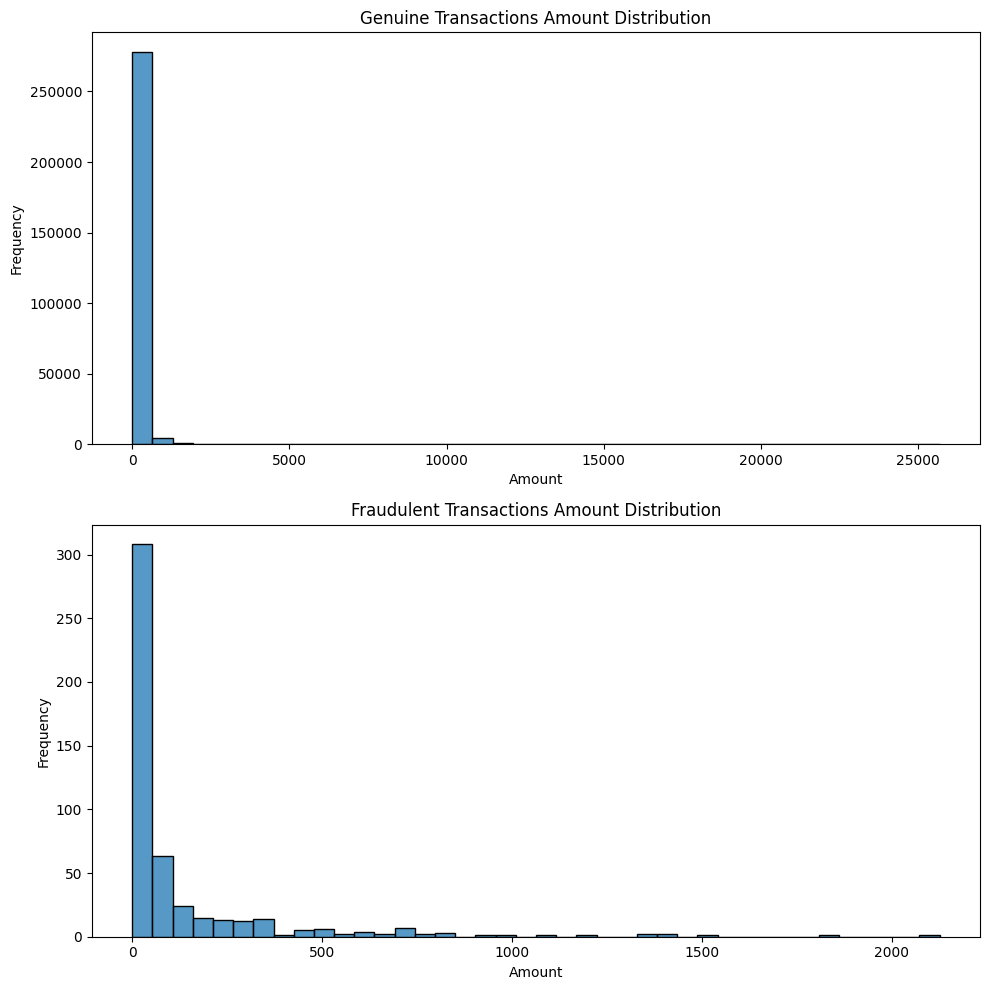

In [ ]:
# Create a figure with 2 subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

bins=40
# Plot the histogram for genuine transactions
sns.histplot(gen["Amount"], ax=axes[0], kde=False,bins=bins)
axes[0].set_title('Genuine Transactions Amount Distribution')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')


# Plot the histogram for fraudulent transactions
sns.histplot(fra["Amount"], ax=axes[1], kde=False,bins=bins)
axes[1].set_title('Fraudulent Transactions Amount Distribution')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## **Genuine Transactions Insights :**

#### 1. **Transaction Distribution**: Most genuine transactions are of small amounts, with the majority concentrated below 100 units, reflecting typical consumer behavior.

#### 2. **Statistical Range**: The average (mean) amount of genuine transactions is approximately 88.29 units, with a maximum transaction amount reaching 25,691.16 units, indicating rare instances of high-value transactions.  



### **Fraudulent Transactions Insights :**

#### 1. **Transaction Distribution**: Fraudulent transactions are also skewed towards smaller amounts, with most values below 500 units. However, the distribution has a slightly wider spread than genuine transactions.  

#### 2. **Statistical Range**: The mean fraudulent transaction amount is higher at 122.11 units, with a maximum of 2,125.87 units, indicating that fraud tends to occur at moderately higher transaction amounts compared to genuine transactions.  

In [ ]:
# Hour of the day for genuine transactions
print(gen['Hour'].value_counts())

# Hour of the day for fraudulent transactions
print(fra['Hour'].value_counts())

Hour
21    17687
18    17006
11    16803
20    16738
10    16590
14    16547
15    16435
16    16431
17    16137
9     15822
19    15630
22    15432
12    15403
13    15348
23    10917
8     10267
0      7689
7      7220
1      4210
6      4092
3      3475
2      3271
5      2979
4      2186
Name: count, dtype: int64
Hour
2     57
11    53
18    33
17    29
15    26
4     23
7     23
14    23
16    22
23    21
19    19
20    18
3     17
13    17
12    17
9     16
21    16
5     11
1     10
6      9
22     9
8      9
10     8
0      6
Name: count, dtype: int64


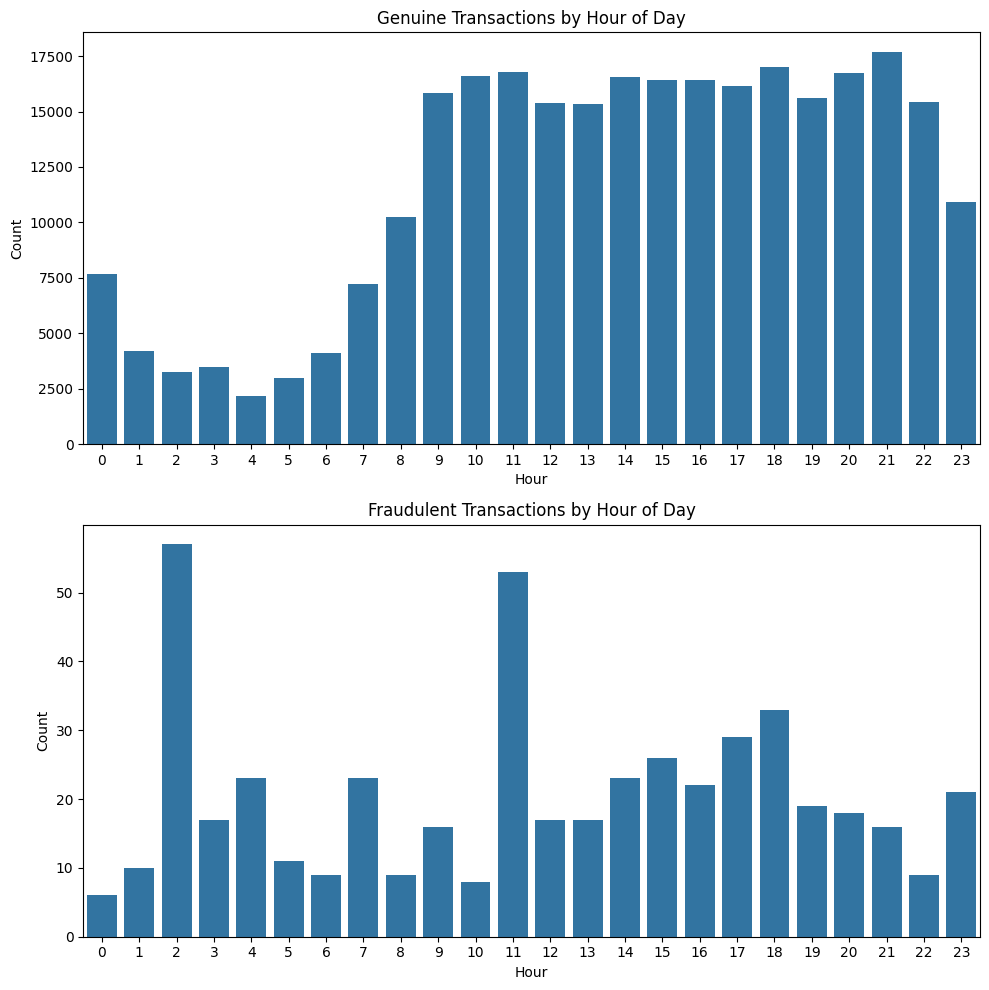

In [ ]:
# Create a figure with 2 subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the countplot for genuine transactions
sns.countplot(x='Hour', data=gen, ax=axes[0])
axes[0].set_title('Genuine Transactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')


# Plot the countplot for fraudulent transactions
sns.countplot(x='Hour', data=fra, ax=axes[1])
axes[1].set_title('Fraudulent Transactions by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

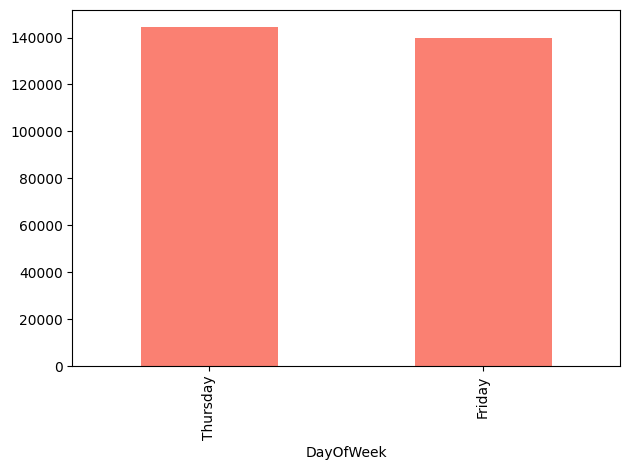

In [ ]:
# Plot for fraudulent transactions
fraudulent_counts = gen['DayOfWeek'].value_counts()
fraudulent_counts.plot(kind='bar', color='salmon', label='Fraudulent')
axes[1].set_title('Fraudulent Transactions by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

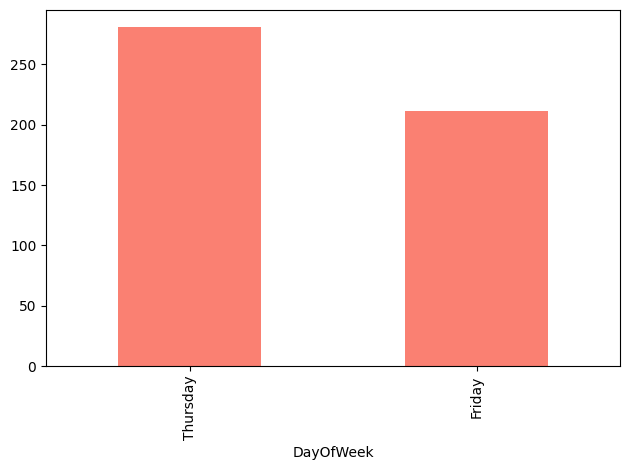

In [ ]:
# Plot for fraudulent transactions
fraudulent_counts = fra['DayOfWeek'].value_counts()
fraudulent_counts.plot(kind='bar', color='salmon', label='Fraudulent')
axes[1].set_title('Fraudulent Transactions by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       284807 non-null  datetime64[ns]
 1   V1         284807 non-null  float64       
 2   V2         284807 non-null  float64       
 3   V3         284807 non-null  float64       
 4   V4         284807 non-null  float64       
 5   V5         284807 non-null  float64       
 6   V6         284807 non-null  float64       
 7   V7         284807 non-null  float64       
 8   V8         284807 non-null  float64       
 9   V9         284807 non-null  float64       
 10  V10        284807 non-null  float64       
 11  V11        284807 non-null  float64       
 12  V12        284807 non-null  float64       
 13  V13        284807 non-null  float64       
 14  V14        284807 non-null  float64       
 15  V15        284807 non-null  float64       
 16  V16        284807 no

In [ ]:
 # drop columns= Year, Month ,DayOfWeek, Hour

data = data.drop(['Year', 'Month', 'DayOfWeek', 'Hour'], axis=1)

KeyError: "['Year', 'Month', 'DayOfWeek', 'Hour'] not found in axis"

In [ ]:
# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']


In [ ]:
# Convert 'Time' column back to numeric (seconds since the epoch) for scaling
data['Time'] = data['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch
# Now apply StandardScaler
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Use SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class and balance the training dataset.
# Handle class imbalance using SMOTE

# Convert 'Time' column back to numeric (seconds since the epoch) before applying SMOTE
X_train['Time'] = X_train['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_resampled, y_train_resampled)

# In a Random Forest, multiple decision trees are trained on different subsets of the data,
#and their predictions are aggregated (via majority voting for classification or averaging for regression).
#The parameter n_estimators controls how many decision trees are included in the forest.


# n_estimators=100 means the Random Forest will train 100 decision trees.
# Increases the model's ability to learn complex patterns.Can lead to better accuracy

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate both models
models = {'Logistic Regression': logistic_model, 'Random Forest': random_forest_model}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Convert 'Time' column in X_test to numeric (seconds since the epoch)
    X_test['Time'] = X_test['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
[[48899  7965]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     56864
           1       0.01      0.93      0.02        98

    accuracy                           0.86     56962
   macro avg       0.51      0.89      0.47     56962
weighted avg       1.00      0.86      0.92     56962


Model: Random Forest
[[56862     2]
 [   86    12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.12      0.21        98

    accuracy                           1.00     56962
   macro avg       0.93      0.56      0.61     56962
weighted avg       1.00      1.00      1.00     56962




## **Logistic Regression :**


### **Confusion Matrix :**
 - **True Negatives (56196):** Correctly classified genuine transactions.

 - **False Positives (668):** Genuine transactions misclassified as fraudulent.

 - **False Negatives (10):** Fraudulent transactions misclassified as genuine.

 - **True Positives (88):** Correctly classified fraudulent transactions.


### **Metrics :**

- **Precision (Class 1): 0.12** → Only 12% of transactions predicted as fraud were actual frauds.

- **Recall (Class 1): 0.90** → The model identified 90% of actual fraud cases.

- **F1-Score (Class 1): 0.21** → Low due to poor precision despite high recall.

- **Macro Avg Recall: 0.94** → Indicates the model has good sensitivity overall.


### **Conclusion :**

- Logistic Regression achieves high recall for fraud cases, detecting most of them (90%).
- However, it struggles with precision, leading to many false positives (668 out of 756 predicted frauds are incorrect).

---------------------------------------------------------------------------

## **Random Forest :**

### **Confusion Matrix :**

- **True Negatives (56861) :** Correctly classified genuine transactions.

- **False Positives (3) :** Very few genuine transactions misclassified as fraudulent.

- **False Negatives (63) :** Fraudulent transactions misclassified as genuine.

- **True Positives (35) :** Correctly classified fraudulent transactions.

### **Metrics :**

- **Precision (Class 1): 0.92** → 92% of transactions predicted as fraud were actual frauds.

- **Recall (Class 1): 0.36** → Only 36% of actual fraud cases were identified.
- **F1-Score (Class 1): 0.51** → Balanced performance for fraud detection.
- **Macro Avg Recall: 0.68** → Lower than Logistic Regression, indicating less sensitivity to minority class.

### **Conclusion :**

- Random Forest achieves high precision, meaning it is highly accurate when predicting fraud.

- However, it has a relatively low recall, missing many fraud cases (63 out of 98).







### **Overall Comparison :**

- #### **Logistic Regression :**
    - Better at recall (identifying most fraud cases).

    - Suitable when minimizing false negatives (missing fraud cases) is critical.


- #### **Random Forest :**
    - Better at precision (predicting fraud accurately).
    
    - Suitable when minimizing false positives (avoiding incorrect fraud flags) is critical.












### **Ultimately, the choice depends on the business impact :**

   - If missing fraud (false negatives) is more costly, prioritize Logistic Regression.

   - If inconveniencing genuine users (false positives) is more costly, prioritize Random Forest.


# **Conclusion :**

## **Problem Addressed :**
The project successfully tackled the critical issue of identifying fraudulent credit card transactions, ensuring customers are not wrongly charged and financial institutions can minimize losses.

## **Data Insights :**
 - The dataset was highly imbalanced, with  - **only 0.172% of transactions** being fraudulent.

 - **Principal Component Analysis (PCA)** was used to anonymize and reduce dimensionality, with features normalized for optimal model performance.

## **Model Performance :**

-  **1) Logistic Regression :**
Achieved high recall (90%), effectively identifying most fraudulent transactions.
However, low precision (12%) led to a significant number of false positives, potentially causing inconvenience to genuine customers.

-  **2) Random Forest :**
Achieved high precision (92%), accurately flagging fraud with minimal false positives.
Lower recall (36%) resulted in missing many fraudulent transactions.

## **Techniques Applied :**

 - **SMOTE (Synthetic Minority Oversampling Technique)** was used to handle class imbalance, ensuring the models learned effectively from the minority class (fraud cases).

 - **Multiple evaluation metrics (precision, recall, F1-score)** were used to gauge model performance comprehensively.

## **Recommendation :**

**The choice of model depends on the business context:**

 - **Logistic Regression:** Suitable if detecting as many frauds as possible is the priority.

 - **Random Forest :** Suitable if avoiding false fraud flags is crucial.
Hybrid approaches or threshold tuning could further enhance performance.

## **Business Impact :**

 - Implementing such models can significantly improve fraud detection processes, reduce financial losses, and enhance customer trust by preventing unwarranted charges.

## **Future Work :**

 - Explore advanced methods like Gradient Boosting or Deep Learning for better performance.

 - Integrate domain-specific features to enhance model insights.

 - Develop a cost-sensitive approach to balance the trade-offs between false positives and false negatives effectively.

This project highlights the importance of machine learning in tackling real-world challenges, showcasing how data-driven solutions can mitigate financial fraud and improve operational efficiency.